<a href="https://colab.research.google.com/github/legilify-team/getting-started/blob/main/legilify_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Legilify API

Welcome to the getting started guide for Legilify. 

Put simply, **Legilify** is an AI that allows you to **automate** tasks to do with **text** that you might normally have to do yourself. It's very fast and efficient, so it frees you up to do something else.

Legilify is a type of AI, known as NLP, which stands for Natural Language Processing. Which just means AI for text.

# Use Cases

A few things you could try...

- **Do people like your tweets?** Analyse responses to your tweets - using *Legilify Topics or Legilify Sentiment*
- **Is your marketing copy any good?** Check how well your marketing messaging aligns with your core values - using *Legilify Comparison*
- **How suitable are you for that job you want?** Check how well your CV/Resume matches a job description for a role you would like to apply for - using *Legilify Comparison*
- **Are you the next Booker Prize winner?** Discover how sharp your writing is by looking at its concision percentage - using *Legilify Info*
- **What messages are buried in your customer calls?** Condense a lengthy call transcript down to its most important features - using *Legilify Highlights*


Sounds pretty cool.

Remember that the key thing here is, it can look at *all* your tweets, calls and marketing materials; 

it gives you massive ability to scale.

# What can Legilify do?

Legilify takes all requests to the endpoints as JSON formatted text. This getting started guide, will walk you through setup and a worked example.

But first some details:

The Legilify API has 5 endpoints, these are:
- info
- comparison
- highlights
- topics
- sentiment

**Info**

The info endpoint returns basic information about the supplied document, including word count, unique words, sentence count and concision

**Comparison**

The comparison endpoint allows you to supply more than one document, specify the primary document and get results showing how similar the documents are as a score

**Highlights**

The highlights endpoint returns a bullet point summary of your document 'compressing' it to the sentences that most represent the document. You specify the amount of compression

**Topics**

The topics endpoint allows you to supply a document and a set of conceptual topics and discover if those concepts are in the document. The answer is returned as a score

**Sentiment**

The sentiment endpoint allows you to supply a document and see whether the sentiments of happiness, sadness, suprise/ fear, or anger/disgust are in the document. The answer is returned as a score




# Get Started

**Currently the Legilify API is in free trial mode for a limited capacity to give you the chance to see what you can achieve with it**

Please note: This guide assumes a basic level of coding knowledge, but even if you don't have that, you should still be able to work through the steps outlined here.

To use Legilify you need to sign up at https://portal.legilify.com
this will get you an API key which you should keep somewhere safe and not reveal to anyone. You need the API key to authorise your code when using the API. The key will be used to calculate your usage.

The Legilify API is asynchronous and uses webhooks to send you the results of your request. So, along with your API key, you also need to supply a callback url (webhook). There are many ways to achieve this, but using a free service called **Pipedream** we have created a customisable workflow to get started.

There is a shared workflow at https://pipedream.com/@jakeio/all2slack-p_pWCOKp which will allow you to set up a callback url (webhook) which will pipe your request response into Slack. 

Please note you'll need **Slack** for this, but this is also free to use. https://slack.com

The Pipedream workflow provided can be customised to your requirements (see image below). 

All you need to do is:
- Click the shared workflow link above
- In Pipedream, copy the workflow by pressing **COPY** button
- In Pipedream, authorise Slack by pressing **CONNECT SLACK** button (will take you to Slack)
- In Pipedream, type in {{event.body}} for the **Text** parameter as shown below
- In Pipedream, type the name of your Slack channel in the **Channel** parameter
- In Pipedream, press **SEND TEST EVENT** button
- Check your Slack

The trigger url generated in Pipedream is your callback url for this guide

Both the request and response are in JSON format


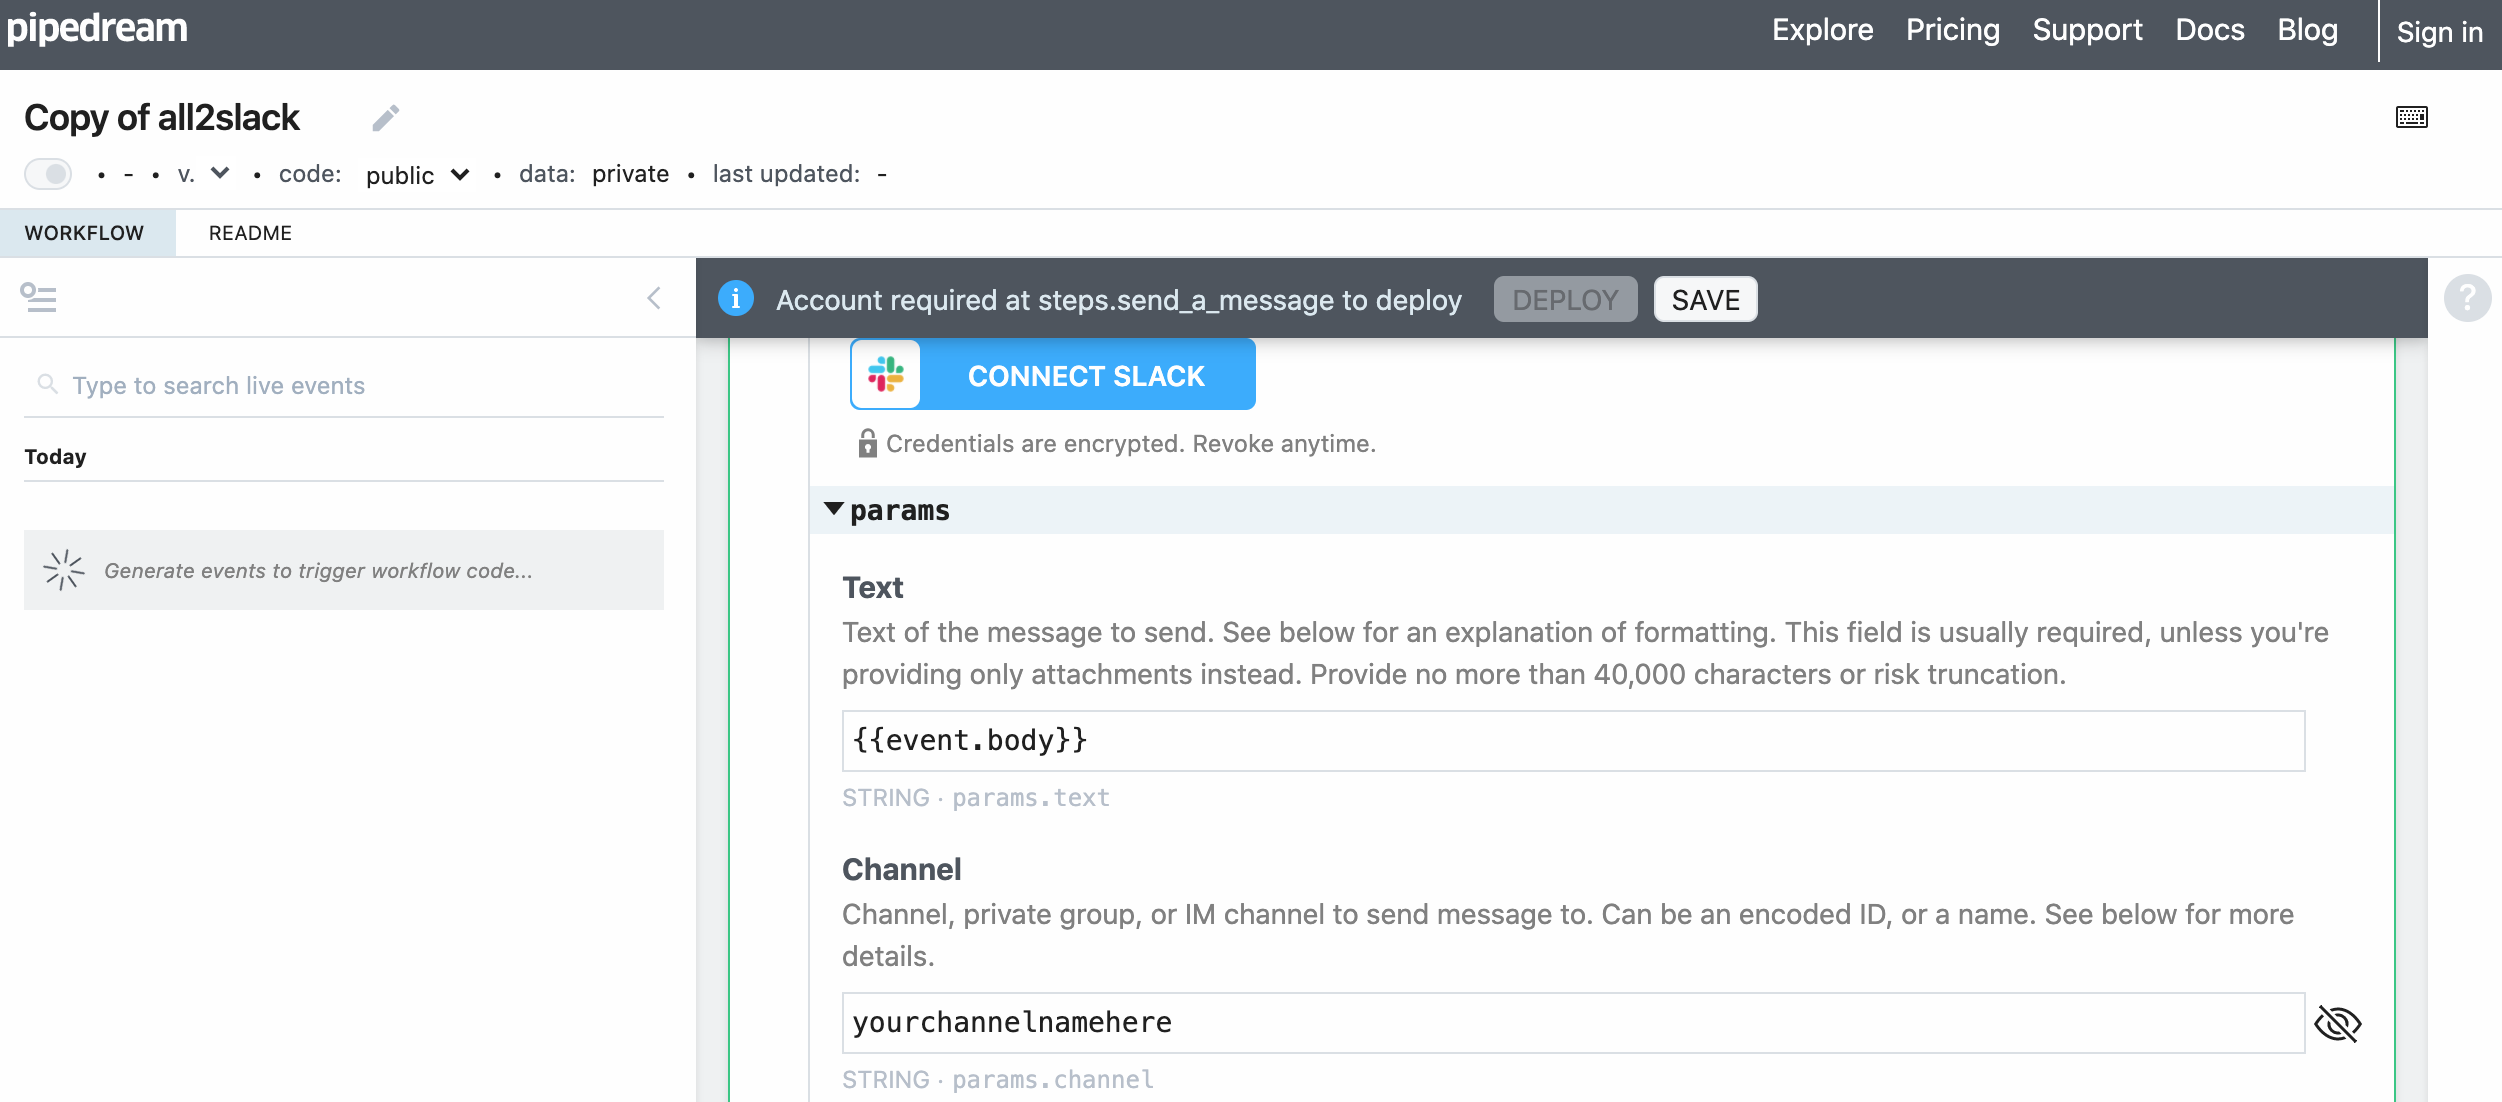

So, below is a sample script that you can use by substituting in the values of your API key and callback url (webhook), as detailed above.

It's worth noting that to use the Legilify API in Python you only need to import the **json** and **requests** libraries to your script.

In [ ]:
# import the libraries
import json
import requests


In [ ]:
# the key and callback url variables you need to fill in yourself

api_key = ""
callback_url = ""

In [ ]:
# set up some variables

# a stop list of Parts Of Speech (POS) types that we want to ignore
# these are mostly words that join other woords like "the", "and", "it"
stop_pos_list = ["DT","IN","PRP","PRP$","RB"]

# the endpoint that we wish to use - values are "info", "highlights", "topics", "sentiment", "comparison"
# to start with, we choose info
endpoint = "info"

# this is the url of the legilify API and we add on the endpoint
url = "https://api.legilify.com/analytics/" + endpoint

# these are some headers required to tell the API what to expect
CONTENT_TYPE = "application/json"
ACCEPT = "application/json"
# the API Header will hold your API key for authentication purposes
API_HEADER = api_key

# here we construct the headers in a way expected by the python requests library
headers = {"Content-Type": CONTENT_TYPE, "Accept":ACCEPT, "x-api-key":API_HEADER}

# CALLBACK URL ##
# you MUST provide a callback url for your results to be sent to
# an easy way to do this is to use Pipedream.com to generate a url and route your results to an app, for example, slack

callback = callback_url

You can run this example, which uses the transcription of a demo of sales prospecting call.

Using the "info" endpoint the response will contain statistics about the transcription document


In [ ]:
# set up some data we want to test with
# we will use a demo sales cold call transcript that was found on the internet, the call is about 5 minutes duration
# the variable 'document' holds the transcript of the demo call
# the variable 'doc_fragment_next_steps' holds a section of 'document' that we have selected by hand to
# show how legilify works
# the variable 'doc_fragment_problem' holds another section of 'document' that we will use to demonstrate legilify

document = "uh uh uh. Well, I was going. Hey, go on, Mark. Way. Shot calling. Did I catch it A bad time there? Uh, yeah. Okay. Well, fair enough. Would it be okay if I took 30 seconds? Told you why I called? And if after doesnt make sense, we could just hang up. Thats unfair. Yeah, thats thats Thats all right. Okay, great. So Im not a sales strategist who works with midsize companies to create a game plan for dramatically increasing sales. And my clients typically come to me when theyre losing sales to low cost competitors. There teams Aaron consistently hitting sales targets are finally they just frustrated with the lack of results from their existing sales team? Huh? Any of those issues were untrue to you? Yeah, actually, um, not hitting sales goals has kind of been a problem for my company recently. Tell me just a little bit more about that. Well, you know, we have about 20 to 25 agents in my office. Um, and it just seems like weve been losing a lot of big condo sales. Thio your competitors recently there were not moving quick enough when we are showing the places we seem to be just somehow not closing the sales. Um, I havent been able to figure out what the real issues are, but were, uh were definitely losing some business. Yeah. I mean, what have you done to fix this? You know, Ive had some chats with my bigger sales guys to see what the problems are that they seem to think, you know, why arent they closing these sales compared to what they were doing six months ago? In a year ago? Again, we havent really been able to put our finger on something. The market is great right now. Theres places that are selling in a day to two days after they go on the market. And were just not getting those places were having people come to us. You wanna buy condos, they want to move quickly, and were just losing out on a lot of great places. Its really coming issue here. What would you say? This? This issues costing you in your organization. I have to say I probably say around two and 1 2 to 3 million. Well, Colin, can I make a recommendation? Yeah, sure. Why dont we set up an appointment on, get together face to face. Id say it takes about, you know, 60 minutes or so, and we can talk this further. I think theres some some ideas that I could share with you to really help you solve this challenge. I mean, does that make any sense to you? Yeah. Be every real intercepted meeting. Okay, great. So, um, what works for you next week? Next week? I think Im pretty busy Monday and Tuesday, but I could do like a Wednesday afternoon or Thursday morning. Okay. Um, look at my calendar. Wednesday afternoon is fine with me. So whats best for you Wednesday afternoon? How long she put on the counter? Any time after 2 p.m. Okay. I can actually make 2 30 work. Okay. And, um, so the address for your office just to confirm is a Broadway street in Boston, right? Thats correct. Okay, great. And just before hanging up, is there anyone else that you would want to include in this conversation who might be involved in? Im in this kind of a decision. Uh, no, really. Just Im the decision maker, so thing you know, theres nobody that I think. Ok, terrific. Well, then I will see you at your office, and we will discuss this a little bit further than great. Thank you. Thank you. So there is the actual prospecting call I want to hear from you. What ideas do you take from this reenactment? Be sure to share below in the common section. And I will get to every single comment that I can. And if you enjoy this video, click right here for a free E books on 25 tips to crush your sales goals. Seriously, its an amazing e book, and its free. So just click right here. Also, if you got some value, please, like this video on YouTube, because that really helps me out. And dont forget to subscribe to my YouTube channel by clicking right here to get access to a new video just like this one Each and every week."

doc_fragment_next_steps = "get together face to face. Id say it takes about, you know, 60 minutes or so, and we can talk this further. I think theres some some ideas that I could share with you to really help you solve this challenge. I mean, does that make any sense to you? Yeah. Okay, great. So, um, what works for you next week? Next week? I think Im pretty busy Monday and Tuesday, but I could do like a Wednesday afternoon or Thursday morning."
doc_fragment_problem = "sales targets are finally they just frustrated with the lack of results from their existing sales team? Huh? Any of those issues were untrue to you? Yeah, actually, um, not hitting sales goals has kind of been a problem for my company recently. Tell me just a little bit more about that. Well, you know, we have about 20 to 25 agents in my office. Um, and it just seems like weve been losing a lot of big condo sales. Thio your competitors recently there were not moving quick enough when we are showing the places we seem to be just somehow not closing the sales."


The API expects the request payload to be formatted as JSON.
There are some required arguments and some optional arguments

In [ ]:
document_list = [document]
primary_doc_name = "test_doc"
document_name_list = [primary_doc_name]
compression_factor = ""
stored_concepts = {}
supplied_concepts = {}

body = {"status":"200","function_name":"from local","callback_url": callback,"data": {"document_list": document_list, "primary_doc_name": primary_doc_name, "document_name_list": document_name_list},
	"parameters": {"compression_factor": compression_factor,"stop_pos_list": stop_pos_list,"stored_concepts": stored_concepts,"supplied_concepts": supplied_concepts,"by_line": "False"}}


If all has gone well you will see a 2xx response and you should then check the place you routed the output to using your callback url (webhook)

In [ ]:
r = requests.post(url, headers=headers, data=json.dumps(body))
print(r, r.text)

<Response [200]> {
  "message" : "received request"
}
